### Trường ĐH Khoa học tự nhiên
Khoa Điện tử Viễn thông
# <center > Đề thi mẫu Môn TH DSP </center>
<center >Thời gian: 40 phút<br> </center>
<center >Được sử dụng tài liệu</center>
##Mã đề: 01

In [ ]:
#Họ và tên:
#MSSV:
#Đề:

In [1]:
 #Thư viện
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#### Câu 1: (2 điểm)
Viết chương trình tạo và vẽ tín hiệu x gồm các yêu cầu sau: <br>
> x là tổng hợp của 3 tín hiệu hình sin: <br>
>> a1 = 2, f1 = 8Hz, pha = 0 <br>
>> a2 = 3, f2 = 11 Hz, pha = $\pi/6$ <br>
>> a3 = 0.8, f3 = 42 Hz, pha3 = $\pi/3$ <br>

> Tần số lấy mẫu: fs = 1 KHz<br>
> Thời gian vẽ: 2 s


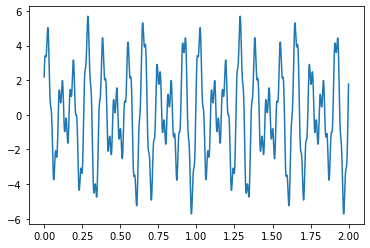

In [10]:
t = 2
fs= 1000
f1 = 8
f2 = 11
f3 = 42
a1 = 2
a2 = 3
a3 = 0.8
n = np.linspace(0,t,fs*t,endpoint=False)
x = a1*np.sin(2*np.pi*f1*n) + a2*np.sin(2*np.pi*f2*n + np.pi/6) + a3*np.sin(2*np.pi*f3*n + np.pi/3)
plt.plot(n,x)

#### Câu 2 (2 điểm)
Vẽ phổ biên độ và phổ pha của tín hiệu x theo tần số Hz

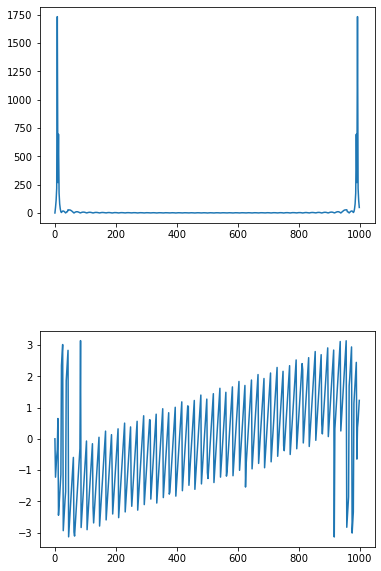

In [12]:
a = [1]
w, X =signal.freqz(x,a,worN=512,whole=True)
plt.subplot(2,1,1)
plt.plot((w/np.pi)*(fs/2),np.abs(X))
plt.subplot(2,1,2)
plt.plot((w/np.pi)*(fs/2),np.angle(X,deg=False))
plt.subplots_adjust(top=2,hspace=0.5)

#### Câu 3: (3 điểm)
Thiết kế mạch lọc FIR để lọc bỏ tín hiệu f3 = 42 Hz  trong tín hiệu x ở câu 1 <br>
Cho biết các giá trị sau: <br>
a. Lọc thiết kế là loại lọc thông gì? (0.5 điểm)<br>
b. Vẽ đáp ứng tần số của bộ lọc theo Hz (2.5 điểm)

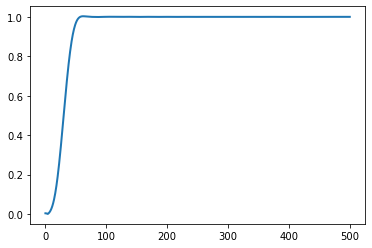

In [13]:
nSamples = fs*t
sampleRate = fs
nyquistRate = fs/2
fc = 30
wC = fc/nyquistRate
b = signal.firwin(65,wC,window="hamming",pass_zero=False)
w,H = signal.freqz(b,1,worN=1024)
plt.plot((w/np.pi)*nyquistRate,abs(H),linewidth = 2)


#### Câu 4: (2 điểm)
Vẽ phổ biên độ của tín hiệu y là ngõ ra của bộ lọc thiết kế ở câu 3 với tín hiệu vào là x (theo Hz)


(0.0, 200.0)

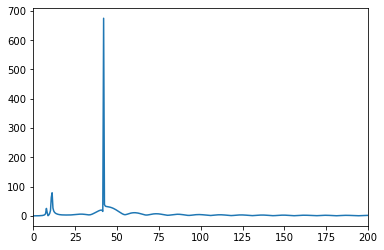

In [17]:
y = signal.lfilter(b,1,x)
w,Y = signal.freqz(y,1,worN=1024)

plt.plot((w/np.pi)*nyquistRate,abs(Y))
plt.xlim(0,200)

#### Câu 5: (1 điểm)
Vẽ tín hiệu vào x và ra y trên cùng một hình sử dụng subplot